In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from nltk.stem import WordNetLemmatizer

**Read in target data**

In [2]:
data = pd.read_csv("data/training_variants.csv",index_col='ID')

In [3]:
data.head()

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [4]:
data.tail()

,Gene,Variation,Class
ID,,,
3316,RUNX1,D171N,4
3317,RUNX1,A122*,1
3318,RUNX1,Fusions,1
3319,RUNX1,R80C,4
3320,RUNX1,K83E,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3321 non-null   object
 1   Variation  3321 non-null   object
 2   Class      3321 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 103.8+ KB


**Read in text data**

In [6]:
text = pd.read_csv('data/training_text.csv', sep = '\|\|', engine = 'python', names = ['ID','Text'], skiprows = 1, index_col = 'ID')

In [7]:
text.head()

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [8]:
text.tail()

,Text
ID,
3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,The Runt-related transcription factor 1 gene (...
3319,The RUNX1/AML1 gene is the most frequent targe...
3320,The most frequent mutations associated with le...


In [9]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3316 non-null   object
dtypes: object(1)
memory usage: 51.9+ KB


Combine data sets

In [10]:
merged = data.merge(text, how='left', on='ID')

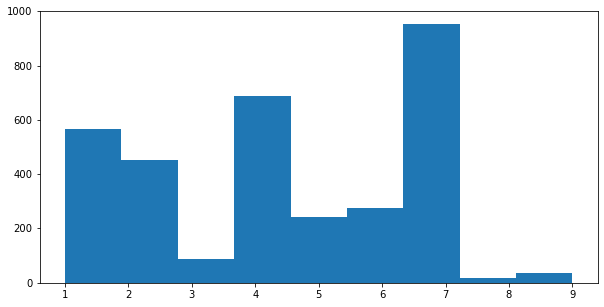

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(merged['Class'], bins=9);

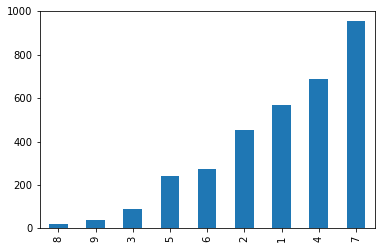

In [12]:
merged.Class.value_counts().sort_values().plot(kind = 'bar');
# df.letters.value_counts().sort_values().plot(kind = 'barh')

/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


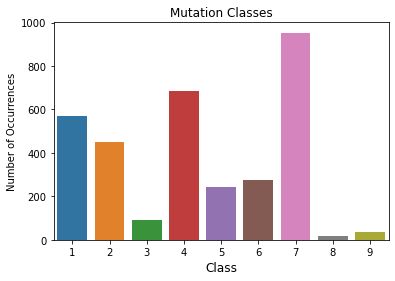

In [13]:
class_count  = merged['Class'].value_counts()
sns.barplot(class_count.index, class_count.values)
plt.title('Mutation Classes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Class', fontsize=12);

In [14]:
merged[merged.isnull().any(axis=1)]

,Gene,Variation,Class,Text
ID,,,,
1109,FANCA,S1088F,1,NaN
1277,ARID5B,Truncating Mutations,1,NaN
1407,FGFR3,K508M,6,NaN
1639,FLT1,Amplification,6,NaN
2755,BRAF,G596C,7,NaN


In [15]:
# drop where text is missing
merged = merged.dropna(how='any', subset=['Text'])

In [16]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3316 non-null   object
 1   Variation  3316 non-null   object
 2   Class      3316 non-null   int64 
 3   Text       3316 non-null   object
dtypes: int64(1), object(3)
memory usage: 129.5+ KB


/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


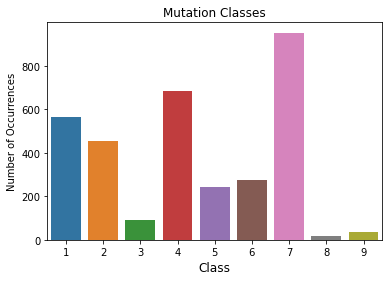

In [17]:
# redo plot after dropping missing text
class_count  = merged['Class'].value_counts()
sns.barplot(class_count.index, class_count.values)
plt.title('Mutation Classes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Class', fontsize=12);

Try different models to classify - logistic reg, random forest, naive bayes - really want to try that one out
keep going with this project this is for a github test

Combine predictors - df['vectorized'] = df['text'] + ' ' + df['gene']+ df['variant']

In [18]:
text_list = merged.Text.tolist()

In [19]:
len(text_list)

3316

In [20]:
y = merged['Class']

In [21]:
type(y)

pandas.core.series.Series

In [ ]:
# y[:5]

**Vectorize and Train-Test Split**

In [ ]:
# initial vectorize
# vectorizer = CountVectorizer()

In [ ]:
# X = vectorizer.fit_transform(text_list)

In [ ]:
# X.shape

In [ ]:
# vectorize with stopwords
vectorizer = CountVectorizer(stop_words='english')

In [ ]:
X = vectorizer.fit_transform(text_list)

In [ ]:
X.shape

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=88)

**Model 1 - Naive Bayes**

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
print(model.predict(X_test[:5]))

In [ ]:
print(model.predict(X_test[-5:]))

In [ ]:
model.predict_proba(X_train[0])

In [ ]:
model.predict_proba(X_test[900])


In [ ]:
model.score(X_test, y_test)

Look at model metrics from previous project - accuracy, precision, recall, confusion matrix

Again with tf-idf vectorizer

**More robust vectorization**

In [22]:
vectorizer = CountVectorizer(min_df=.2, max_df=.8)

In [23]:
X = vectorizer.fit_transform(text_list) 

In [24]:
X.shape

(3316, 1921)

In [25]:
len(vectorizer.vocabulary_)

1921

In [27]:
# vectorizer.vocabulary_

In [28]:
for k, v in sorted(vectorizer.vocabulary_.items()):
    print(k, v)

000 0
0001 1
001 2
01 3
05 4
1000 5
104 6
105 7
106 8
107 9
120 10
150 11
1994 12
1996 13
1997 14
1998 15
1999 16
1a 17
1b 18
1c 19
1d 20
1e 21
200 22
2000 23
2001 24
2002 25
2003 26
2004 27
2005 28
2006 29
2007 30
2008 31
2009 32
2010 33
2011 34
2012 35
2013 36
250 37
27 38
28 39
293t 40
2a 41
2b 42
2c 43
2d 44
300 45
31 46
32 47
33 48
34 49
35 50
36 51
37 52
38 53
39 54
3a 55
3b 56
3c 57
3d 58
400 59
41 60
42 61
43 62
44 63
45 64
46 65
47 66
48 67
49 68
4a 69
4b 70
4c 71
4d 72
4e 73
500 74
51 75
52 76
53 77
54 78
55 79
56 80
57 81
58 82
59 83
5a 84
5b 85
5c 86
60 87
600 88
61 89
62 90
63 91
64 92
65 93
66 94
67 95
68 96
69 97
6a 98
6b 99
6c 100
70 101
71 102
72 103
73 104
74 105
75 106
76 107
77 108
78 109
79 110
80 111
81 112
82 113
83 114
84 115
85 116
86 117
87 118
88 119
89 120
90 121
91 122
92 123
93 124
94 125
95 126
96 127
97 128
98 129
99 130
aa 131
aberrant 132
aberrations 133
ability 134
able 135
abnormal 136
abnormalities 137
abolished 138
about 139
above 140
abrogated 141

targeting 1745
targets 1746
technologies 1747
technology 1748
temperature 1749
template 1750
ten 1751
term 1752
terminal 1753
terminus 1754
terms 1755
test 1756
tested 1757
testing 1758
tests 1759
text 1760
them 1761
therapeutic 1762
therapies 1763
therapy 1764
thereby 1765
third 1766
though 1767
thought 1768
threonine 1769
threshold 1770
throughout 1771
time 1772
times 1773
tissue 1774
tissues 1775
together 1776
tolerated 1777
tool 1778
top 1779
toward 1780
towards 1781
tp53 1782
transactivation 1783
transcript 1784
transcription 1785
transcriptional 1786
transcripts 1787
transduced 1788
transduction 1789
transfected 1790
transfection 1791
transfections 1792
transferred 1793
transformation 1794
transformed 1795
transforming 1796
transient 1797
transiently 1798
transition 1799
translation 1800
translational 1801
translocation 1802
transmembrane 1803
treated 1804
treatment 1805
treatments 1806
trial 1807
trials 1808
triplicate 1809
tris 1810
triton 1811
true 1812
truncated 1813
truncati

In [32]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=88)

**Model**

In [33]:
model = MultinomialNB

In [34]:
model.fit(X_train, y_train)

TypeError: fit() missing 1 required positional argument: 'y'